In [3]:
#Import Python libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [4]:
#Import and visualize dataset

data = pd.read_csv('bdata.csv')
print(data.columns)
print("dimension of data: {}".format(data.shape))

#No nulls and nothing out of the ordinary with info() results
data.info()
data.head()

# , 'area_mean', 'smoothness_mean', 'compactness_mean'
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
y = data['diagnosis']

data.describe()

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'diagnosis'],
      dtype='object')
dimension of data: (569, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  perimeter_se     area_se  smoothness_se  \
count     569.000000  ...    569.000000  569.000000     569.000000   
mean        0.181162  ...      2.866059   40.337079       0.007041   
std         0.027414  ...      2.021855   45.491006       0.003003   
min         0.106000  ...      0.757000    6.802000       0.001713   
25%         0.161900  ...      1.606000   17.850000       0.005169   
50%         0.179200  ...      2.287000   24.530000       0.006380   
75%         0.195700  ...      3.357000   45.190000       0.008146   
max         0.304000  ...     21.980000  542.200000       0.031130   

       compactness_se  concavity_se  concave points_se  symmetry_se  \
count      569.000000    569.000000         569.000000   569.000000   
mean         0.025478      0.031894           0.011796     0.020542   
std          0.017908      0.030186           0.006170     0.008266   
min          0.002252      0.000000           0.000000     0.007882   
25%          0.013080      0.015090           0.007638     0.015160   
50%          0.020450      0.025890           0.010930     0.018730   
75%          0.032450      0.042050           0.014710     0.023480   
max          0.135400      0.396000           0.052790     0.078950   

       fractal_dimension_se  radius_worst   diagnosis  
count            569.000000    569.000000  569.000000  
mean               0.003795     16.269190    0.372583  
std                0.002646      4.833242    0.483918  
min                0.000895      7.930000    0.000000  
25%                0.002248     13.010000    0.000000  
50%                0.003187     14.970000    0.000000  
75%                0.004558     18.790000    1.000000  
max                0.029840     36.040000    1.000000  

[8 rows x 23 columns]

In [5]:
#Ensure data does not contain blanks
data.isnull().any()

id                        False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
radius_se                 False
texture_se                False
perimeter_se              False
area_se                   False
smoothness_se             False
compactness_se            False
concavity_se              False
concave points_se         False
symmetry_se               False
fractal_dimension_se      False
radius_worst              False
diagnosis                 False
dtype: bool

In [6]:
#Create training set for supervised learning models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.preprocessing import MinMaxScaler

# Neural Network requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Neural Network

Accuracy on training set: 0.988
Accuracy on test set: 0.958
[[85  3]
 [ 3 52]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.95      0.95      0.95        55

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



/Users/bgoldb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


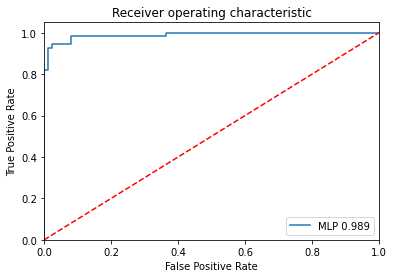

Area Under Curve: 0.989


In [15]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


#Confusion Matrix
y_pred = mlp.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NN_roc_auc = roc_auc_score(y_test, mlp.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP %.3f' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# calculate AUC

print('Area Under Curve: %.3f' % metrics.auc(fpr, tpr))





Business Problem: The goal of this assignment is to accurately predict whether a patients breast cancer tumor is malignant or benign. With this second opinion, doctors can better server our community by treating patients who have malignant tumors. The model should assist doctors in determining whether treatment is needed based on tumor classification.

Machine Learning Applications: Using a neural network to read chest X-Rays to determine if a patient has COVID, pneumonia, or normal scans. Second example is using a neural network to predict which medication would best fit a patient after diagnosis. Third example is using a neural network to classify a patient's diabetes as type 1 or 2.

Machine Learning Algorithms: 
Neural Network:
A neural network is an artificial approach to mimicing the fuction of the brain. Using the idea of neurons, we can imitate that function. The process of a neural network starts by taking x values and multiplying it by individual weights. After the value is computed, a bias variable is added to the result. The two previous steps are repeated until it reaches the activation function. The activation function intakes the value from the previous steps to determine where it falls on a 0 to 1 binary scale. With that result, the model is predicting the outcome and values can be assigned to 1 and 0.

Data Preprocessing Discussion: I took a look at the dataset to see how many rows and columns we had. Knowing that, I took it a step further to see if any of the data points were blank. Lastly, I ensured the datapoints made sense by checking for extreme outliers. An example of that would be looking for a value of over 1000 because a tumor shouldn't be that large.

Explaining Metrics: In the metrics section, I expected a neural network to intake many features without problem so narrowing down the feature list was unnecessary. Next, I discussed the idea of scalability. If the dataset would continue to grow, I recommended switching from an MLP to Keras neural network to utilize GPU processing power.

Interpreting Results: I used accuracy calculation, ROC/AUG values, and the confusion matrix to evaluate the models performance. Taking into account that we are in the healthcare industry and lives are at stake, maximizing performance while ensuring the least amount of false negatives were created was paramount. False positives leave patients with life threatening tumors believing they are safe and sound when they are in need of treatment. I compared the confusion matrix from our last assignment as a base point and noticed Naive Bayes had the least amount of false negatives. If that model were in scope, I would select it to reduce the amount of lives at risk from a false negative.

Recommended Steps: The first step in optimizing performance, in my opinion, would be to gather more data. If we could switch and compare the Keras neural network to MLP, we could review performance and accuracy. If the dataset would continue to grow, I would recommend switching to Keras to ensure scalability. Next, I wanted to highlight the importance of false positives. False positives to me are the highest priority item when determining a model to use. Seeing the neural network did not have the lowest count of false positives, I would adjust the alpha and add more training data to ensure we brought that count down.